In [89]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mesh import Mesh

In [90]:
points = np.array([[1, 0, 0], [0, 0, 1], [0, 1, 0]])
point_normals = np.array([[1.0, 1.0, 1.0]]*3)
point_normals /= np.linalg.norm(point_normals,axis=-1,keepdims=True)
simplices = [[0,1,2]]
print(len(simplices))
mesh = Mesh(points, simplices, point_normals)
print(mesh.print_members())

1
barycenters = [[0.33333333 0.33333333 0.33333333]]
barynormals = [[0.57735027 0.57735027 0.57735027]]
areas = [0.8660254037844389]
owners = [0, 0, 0]
neighbours = [-1, -1, -1]
edges_to_vertices = [(0, 1), (1, 2), (0, 2)]
edge_lengths = [1.41421356 1.41421356 1.41421356]
edge_centers = [[0.5 0.  0.5]
 [0.  0.5 0.5]
 [0.5 0.5 0. ]]
edge_tangents = [[-0.70710678  0.          0.70710678]
 [ 0.          0.70710678 -0.70710678]
 [-0.70710678  0.70710678  0.        ]]
edge_bitangents = [[0.57735027 0.57735027 0.57735027]
 [0.57735027 0.57735027 0.57735027]
 [0.57735027 0.57735027 0.57735027]]
edge_normals = [[-0.40824829  0.81649658 -0.40824829]
 [ 0.81649658 -0.40824829 -0.40824829]
 [ 0.40824829  0.40824829 -0.81649658]]
edge_weighing_factor = [1. 1. 1.]
skewness = [0. 0. 0.]
skewness_vector = [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
points = [[1 0 0]
 [0 0 1]
 [0 1 0]]
point_normals = [[0.57735027 0.57735027 0.57735027]
 [0.57735027 0.57735027 0.57735027]
 [0.57735027 0.57735027 0.57735027]]

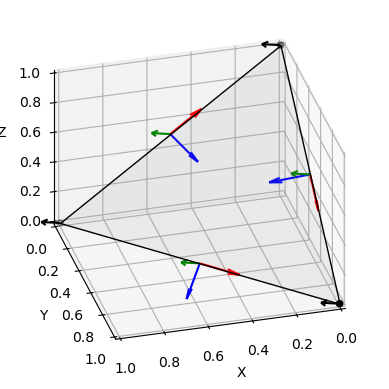

In [91]:
# Setup for a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', proj_type='ortho')

# Plot each simplex
for simplex in simplices:
    polygon = points[simplex]
    ax.add_collection3d(Poly3DCollection([polygon], facecolors='grey', linewidths=1, edgecolors='k', alpha=.1))

# Set plot display parameters
ax.scatter(points[:,0], points[:,1], points[:,2], color='k')  # Plot the points
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Adjusting the scale for better visualization
max_range = np.array([points[:,0].max()-points[:,0].min(), 
                    points[:,1].max()-points[:,1].min(), 
                    points[:,2].max()-points[:,2].min()]).max() / 2.0
mid_x = (points[:,0].max()+points[:,0].min()) * 0.5
mid_y = (points[:,1].max()+points[:,1].min()) * 0.5
mid_z = (points[:,2].max()+points[:,2].min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

# Draw cell normal

# Draw edge transform matrix
# Plot each vector
for face_idx in range(len(mesh.edge_lengths)):
    ax.quiver(*(mesh.edge_centers[face_idx]), *(mesh.edge_tangents[face_idx]), color='red', label='Tangent', length=0.2)
    ax.quiver(*(mesh.edge_centers[face_idx]), *(mesh.edge_bitangents[face_idx]), color='green', label='Bitangent', length=0.2)
    ax.quiver(*(mesh.edge_centers[face_idx]), *(mesh.edge_normals[face_idx]), color='blue', label='Normal', length=0.2)

# Draw point normals
# Plot each vector
for point_idx in range(len(mesh.points)):
    ax.quiver(*(mesh.points[point_idx]), *(mesh.point_normals[point_idx]), color='black', label='Tangent', length=0.2)

# Adjust the view of the camera
ax.view_init(elev=30, azim=75) # You can modify these values as needed
#ax.view_init(elev=0, azim=90) # You can modify these values as needed
plt.show()

In [92]:
def u(fc):
    x = fc[:,0]
    y = fc[:,1]
    z = fc[:,2]
    return 2.0*x-y-z

def du(fc):
    x = fc[:,0]
    y = fc[:,1]
    z = fc[:,2]
    return np.array([2.0+0*x,-1.0+0*x,-1.0+0*x]).T

def u2(fc):
    x = fc[:,0]
    y = fc[:,1]
    z = fc[:,2]
    return 2*x**2+y**2+z**2-2*x*y-2*x*z

def du2(fc):
    x = fc[:,0]
    y = fc[:,1]
    z = fc[:,2]
    return np.array([4*x-2*y-2*z, 2*y-2*x, 2*z-2*x]).T


phi_f = u(mesh.edge_centers)
dphi_exact = du(mesh.barycenters)
print(phi_f)

# Estimate \nabla \phi_C
dphi = np.zeros((len(mesh.areas),3))
for phi_fi, normal, center, sf, owner, neighbour in zip(phi_f, mesh.edge_normals, mesh.edge_centers, mesh.edge_lengths, mesh.owners, mesh.neighbours):
    e = center - mesh.barycenters[owner] # (todo) need revision
    direction = 1 if np.dot(e, normal) > 0 else -1
    dphi[owner] += phi_fi * sf * normal / mesh.areas[owner] * direction
    if neighbour != -1:
        dphi[neighbour] -= phi_fi * sf * normal / mesh.areas[neighbour] * direction

print(dphi - dphi_exact)
print(np.dot(dphi[0], mesh.barynormals[0]))
print(np.dot(dphi_exact[0], mesh.barynormals[0]))

[ 0.5 -1.   0.5]
[[-4.44089210e-16  2.22044605e-16  2.22044605e-16]]
0.0
0.0
